[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_4_AprendizajeAutomatico/notebook/ML_02_NaiveBayes.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Part 1: Load data

In [2]:
#Load dataset
wine = datasets.load_wine()

# Print info about features names and labels names
print("Features:", wine.feature_names)
print("Labels:", wine.target_names)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels: ['class_0' 'class_1' 'class_2']


In [3]:
# Print infor about feature values
print(wine.data.shape)
[print(*line) for line in wine.data[0:5]]

(178, 13)
14.23 1.71 2.43 15.6 127.0 2.8 3.06 0.28 2.29 5.64 1.04 3.92 1065.0
13.2 1.78 2.14 11.2 100.0 2.65 2.76 0.26 1.28 4.38 1.05 3.4 1050.0
13.16 2.36 2.67 18.6 101.0 2.8 3.24 0.3 2.81 5.68 1.03 3.17 1185.0
14.37 1.95 2.5 16.8 113.0 3.85 3.49 0.24 2.18 7.8 0.86 3.45 1480.0
13.24 2.59 2.87 21.0 118.0 2.8 2.69 0.39 1.82 4.32 1.04 2.93 735.0


[None, None, None, None, None]

In [4]:
# See labels
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [5]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


# Part 2: Train a naive Bayes classifier

In [6]:
# Create and train a model
NBC = MultinomialNB()
NBC.fit(x_train, y_train)

# Print some info after training
print(f"Classes found: {NBC.classes_}")
print(f"Class frequencies: {NBC.class_count_}") # class frequency
print(f"Class priors: {NBC.class_log_prior_}") # class likelihood, p(y)
print(f"Priors p(x|y): {NBC.feature_log_prob_}") # priors, p(x|y)

# Consulta la documentación the MultinomialNB en sklearn, encuentra la manera de
# imprimir la información faltante en las tres líneas anteriores.
# ¿Notan algo raro en los valores? ¿Por qué creen que se vean así?

# Los valores se ven raros porque son logarítmos. Recordemos que el producto de
# varios términos es equivalente a la sumatoria de sus logarítmos. Y que la sum
# es una operación más barata que la multiplición.

Classes found: [0 1 2]
Class frequencies: [45. 57. 40.]
Class priors: [-1.14916457 -0.91277579 -1.2669476 ]
Priors p(x|y): [[-4.514946   -6.44294676 -6.23075426 -4.3164789  -2.46304286 -6.08435101
  -6.03733348 -8.26907542 -6.46975318 -5.44115353 -7.05316586 -5.97808245
  -0.13608433]
 [-4.00068096 -5.81073094 -5.69570139 -3.49722625 -1.94416626 -5.68573184
  -5.76758332 -7.48878212 -5.99444768 -5.3706113  -6.43525246 -5.47409689
  -0.24598887]
 [-4.08288289 -5.44084165 -5.76092272 -3.59899064 -2.06231871 -6.11104634
  -6.86740383 -7.38616069 -6.47214763 -4.65144406 -6.99948528 -6.13977047
  -0.21926805]]


In [7]:
# Imprime el desempeño del modelo en los sets de entrenamiento y test
y_test_hat = NBC.predict(x_test)
print(f"Ground truth:", y_test)
print(f"Predictions: ", y_test_hat)

# ¿Hay sobre entrenamiento?
print(f"Train mean accuracy: {NBC.score(x_train, y_train):6.4f}")
print(f"Test mean accuracy: {NBC.score(x_test, y_test):6.4f}")
# La diferencia no es tan grande, el potencial de sobre entrenamiento es bajo.

Ground truth: [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
Predictions:  [0 0 2 0 1 0 1 2 1 0 0 1 0 1 0 1 1 1 0 1 0 1 2 2 2 2 1 1 1 0 0 1 0 0 0 0]
Train mean accuracy: 0.8592
Test mean accuracy: 0.8889


# Part3: Performance evaluation

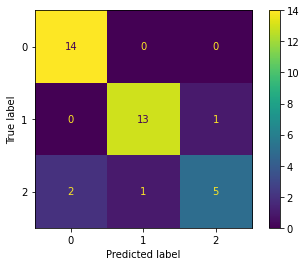

In [8]:
# Generate and plot confusion matrix
CM = confusion_matrix(y_test, y_test_hat, labels=NBC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=NBC.classes_)
disp.plot()

In [9]:
# Print classification summary
print(classification_report(y_test, y_test_hat, labels=NBC.classes_))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.93      0.93      0.93        14
           2       0.83      0.62      0.71         8

    accuracy                           0.89        36
   macro avg       0.88      0.85      0.86        36
weighted avg       0.89      0.89      0.88        36

